<a href="https://colab.research.google.com/github/santoshguna001/CMRIT-Hacks/blob/master/LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/formatted.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Tweet,label,text,length
0,"#4asstratfest interactive workshops: ""claiming...",1,4asstratfest interactive workshop claiming cul...,240
1,tapping into the #imagination; nargis pirani v...,1,tapping imagination nargis pirani vp strategic...,231
2,"""1 billion+ impressions, double-digit growth o...",1,1 billion impression doubledigit growth favora...,229
3,types of pitch theater:\n\npitch dinner theate...,1,type pitch theaterpitch dinner theater snack c...,227
4,things you really don't need to send me a news...,1,thing really dont need send news alert weekend...,221


In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
df['text'] = df['text'].astype(str)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 249170 unique tokens.


In [19]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (535554, 250)


In [20]:
Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (535554, 15)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(374887, 250) (374887, 15)
(160667, 250) (160667, 15)


In [25]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                1515      
Total params: 5,081,915
Trainable params: 5,081,915
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 337398 samples, validate on 37489 samples
Epoch 1/5
337398/337398 [==============================] - 4956s 15ms/step - loss: 1.0926 - accuracy: 0.6719 - val_loss: 0.8121 - val_accuracy: 0.7554
Epoch 2/5
337398/337398 [==============================] - 5030s 15ms/step - loss: 0.7241 - accuracy: 0.7795 - val_loss: 0.7681 - val_accuracy: 0.7684
Epoch 3/5
337398/337398 [==============================] - 5232s 16ms/step - loss: 0.6276 - accuracy: 0.8062 - val_loss: 0.7661 - val_accuracy: 0.7727
Epoch 4/5
337398/337398 [==============================] - 5166s 15ms/step - loss: 0.5657 - accuracy: 0.8237 - val_loss: 0.7822 - val_accuracy: 0.7704
Epoch 5/5
337398/337398 [==============================] - 5119s 15ms/step - loss: 0.5235 - accuracy: 0.8355 - val_loss: 0.8029 - val_accuracy: 0.7711


In [0]:
#gdrive/My Drive/Models
model.save('Final_Model.hdf5')
model.save_weights('Final_Weights.hdf5')

In [44]:
!pwd

/content


In [0]:
!cd /content/gdrive/My\ Drive/Models

In [42]:
!ls


Final_Model.h5	Final_Model.hdf5  Final_Weights.hdf5  gdrive  sample_data


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model.h5')
model_file.Upload()

In [0]:
model.save('Final.h5')
model_file = drive.CreateFile({'title' : 'Final_Model.h5'})
model_file.SetContentFile('Final_Model.h5')
model_file.Upload()
model.save_weights('Final_Weights.hdf5')
model_file_weights = drive.CreateFile({'title' : 'Final_Weights.hdf5'})
model_file_weights.SetContentFile('Final_Weights.hdf5')
model_file_weights.Upload()

In [50]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1hi0zh1KZftkfHbIKTVbQhUeAYxEsPzAH'})

In [51]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

160667/160667 [==============================] - 379s 2ms/step
Test set
  Loss: 0.809
  Accuracy: 0.769


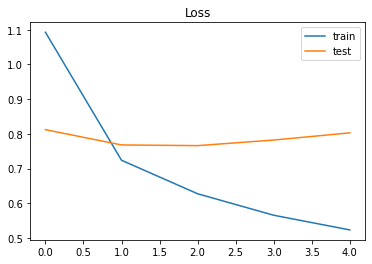

In [56]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

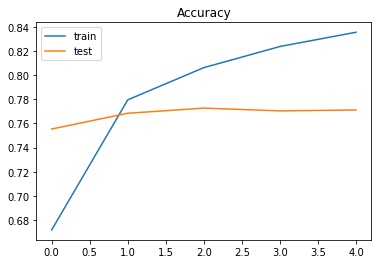

In [59]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [60]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
print(pred)

[[1.5588888e-02 3.2647580e-01 1.2341541e-02 1.2474890e-03 2.9619539e-04
  9.6294138e-04 7.2750327e-04 3.3703058e-03 2.6232591e-01 1.1900099e-01
  6.4070133e-05 1.2520455e-04 3.3639846e-04 2.5696370e-01 1.7303111e-04]]


In [62]:
print(type(tokenizer))

<class 'keras_preprocessing.text.Tokenizer'>


In [65]:
import io
import json
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

31533216

In [0]:
model.save('tokenizer.json')
model_file_tokenizer = drive.CreateFile({'title' : 'tokenizer.json'})
model_file_tokenizer.SetContentFile('tokenizer.json')
model_file_tokenizer.Upload()

In [74]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1BbWi12JxdXtFu39zUOFI459vd_YFLcfn'})

In [75]:
drive.CreateFile({'id': model_file_weights.get('id')})

GoogleDriveFile({'id': '1BA6AimyLpeHd8M0xhN94xMeJdxnINw0a'})

In [76]:
drive.CreateFile({'id': model_file_tokenizer.get('id')})

GoogleDriveFile({'id': '1nUUrUsl5MRlI-QsAo1O7AfIZMJDnNNsW'})